# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:

# Load the dataset
df_letters = pd.read_csv('letters_data.csv')



# View the data
print("\nFirst few rows:")
print(df_letters.head())

# Explore data shape and information
print("\nData shape:")
print(df_letters.shape)

print("\nData information:")
print(df_letters.info())

# Handle missing values
print("\nMissing values per column:")
print(df_letters.isnull().sum())




First few rows:
   label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  pixel127  \
0      1        0        0        0         0         0         0         0   
1      0        0        0        0       137       137       192        86   
2      1        0        0        0         3       141       139         3   
3      4        0        0        0         0         0         0         0   
4      0        0        0        0       155       254       254       254   

   pixel128  pixel129  ...  pixel329  pixel351  pixel410  pixel411  pixel412  \
0         0         0  ...         0       254         0         0         0   
1        72         1  ...       254         0         0        75       254   
2         0         0  ...         0       184         0         0         0   
3         0         0  ...         0         0        94       255        69   
4       157        30  ...       253         0         0         0       223   

   pixel413  pixel414  pixe

In [3]:
# Print the number of duplicate rows
print("Number of duplicate rows:", df_letters.duplicated().sum())

# Remove duplicate rows
df_letters = df_letters.drop_duplicates()

print(df_letters.shape)

Number of duplicate rows: 1633
(40367, 46)


In [4]:
for column in df_letters.columns:
        unique_values = ', '.join(str(value) for value in df_letters[column].unique())
        print(f"Unique values for column '{column}':\n{unique_values}\n")


Unique values for column 'label':
1, 0, 4, 7, 3, 5, 8, 9, 2, 6

Unique values for column 'pixel43':
0, 84, 25, 191, 149, 27, 254, 159, 209, 5, 9, 218, 164, 37, 86, 253, 22, 47, 244, 41, 33, 228, 174, 142, 95, 50, 90, 137, 196, 255, 98, 96, 238, 68, 14, 194, 242, 62, 53, 58, 170, 21, 67, 151, 11, 16, 8

Unique values for column 'pixel44':
0, 244, 255, 253, 118, 103, 54, 25, 92, 220, 6, 15, 205, 219, 162, 165, 38, 224, 47, 86, 207, 63, 157, 99, 32, 166, 178, 246, 146, 16, 126, 51, 226, 239, 3, 184, 14, 182, 248, 254, 132, 191, 81, 168, 31, 10

Unique values for column 'pixel92':
0, 252, 80, 131, 253, 246, 2, 83, 170, 176, 136, 56, 119, 39, 243, 121, 160, 255, 4, 29, 41, 40, 231, 5, 12, 1, 180, 249, 177, 128, 6, 187, 34, 47, 73, 218, 198, 221, 223, 236, 107, 178, 93, 61, 234, 237, 210, 228, 208, 84, 254, 20, 104, 146, 94, 67, 129, 63, 150, 10, 118, 143, 23, 22, 3, 15, 43, 203, 31, 42, 134, 125, 113, 58, 156, 19, 151, 13, 45, 197, 194, 69, 7, 16, 91, 101, 123, 106, 62, 226, 202, 64, 103, 3

In [5]:
# Response Distribution for all variables
for var in df_letters.columns:
    response_counts = df_letters[var].value_counts()
    response_percentages = df_letters[var].value_counts(normalize=True) * 100
    response_summary = pd.DataFrame({'Count': response_counts, 'Percentage': response_percentages})
    print(f"Response Distribution for column '{var}':")
    print(response_summary)
    print()


Response Distribution for column 'label':
   Count  Percentage
1   4636   11.484629
3   4282   10.607675
2   4139   10.253425
6   4137   10.248470
0   4132   10.236084
8   4049   10.030470
4   4037   10.000743
7   3980    9.859539
9   3844    9.522630
5   3131    7.756336

Response Distribution for column 'pixel43':
     Count  Percentage
0    40310   99.858796
255      6    0.014864
25       4    0.009909
149      2    0.004955
254      2    0.004955
253      2    0.004955
242      1    0.002477
196      1    0.002477
98       1    0.002477
96       1    0.002477
238      1    0.002477
68       1    0.002477
14       1    0.002477
194      1    0.002477
53       1    0.002477
62       1    0.002477
90       1    0.002477
58       1    0.002477
170      1    0.002477
21       1    0.002477
67       1    0.002477
151      1    0.002477
11       1    0.002477
16       1    0.002477
137      1    0.002477
142      1    0.002477
50       1    0.002477
37       1    0.002477
191      1    0

In [6]:
df_letters.describe

<bound method NDFrame.describe of        label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  \
0          1        0        0        0         0         0         0   
1          0        0        0        0       137       137       192   
2          1        0        0        0         3       141       139   
3          4        0        0        0         0         0         0   
4          0        0        0        0       155       254       254   
...      ...      ...      ...      ...       ...       ...       ...   
41995      2        0        0        1       248       253       176   
41996      0        0        0        0         0         0         0   
41997      2        0        0        0       255       255       191   
41998      2        0        0        0       255       128         0   
41999      2        0        0      227       253       229       133   

       pixel127  pixel128  pixel129  ...  pixel329  pixel351  pixel410  \
0             0

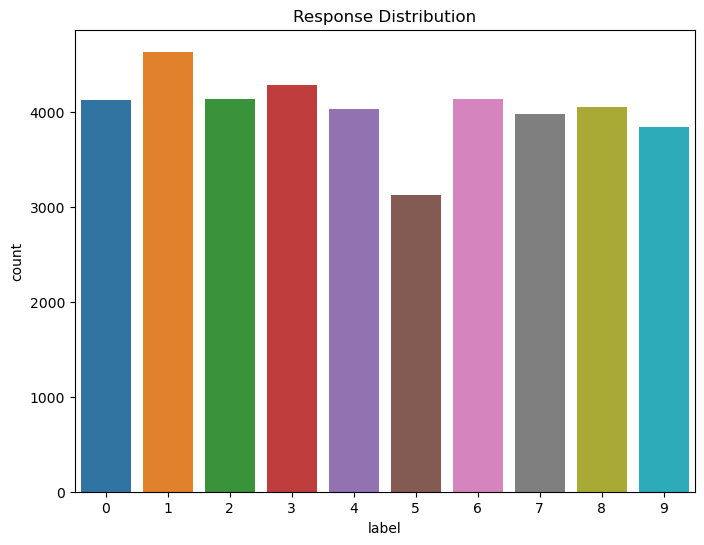

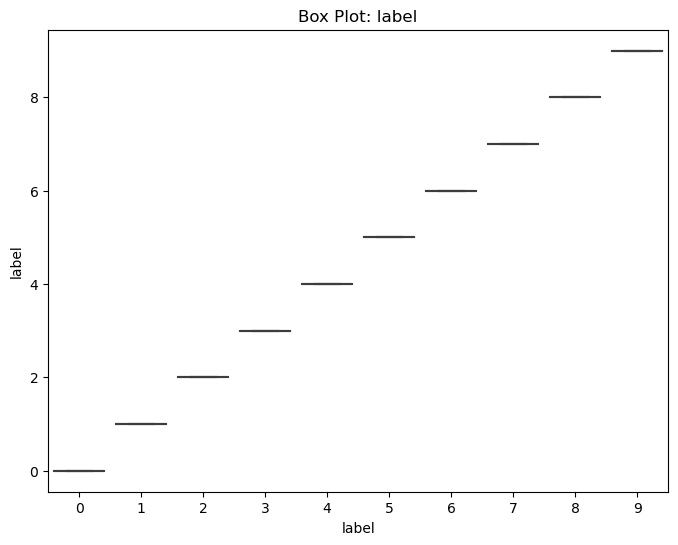

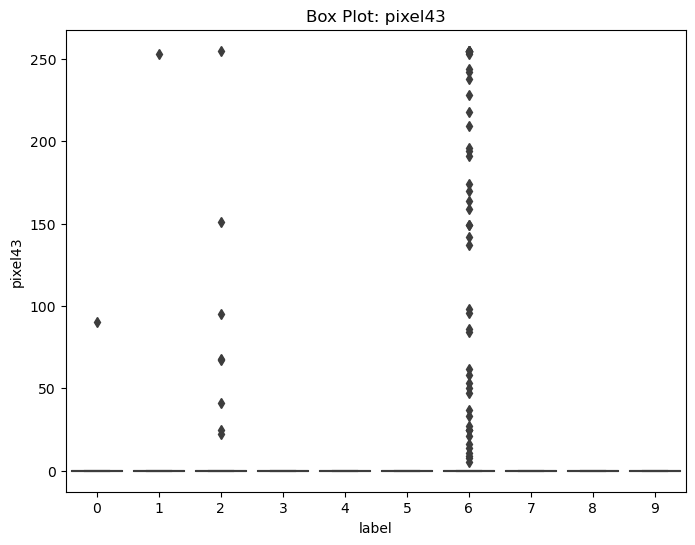

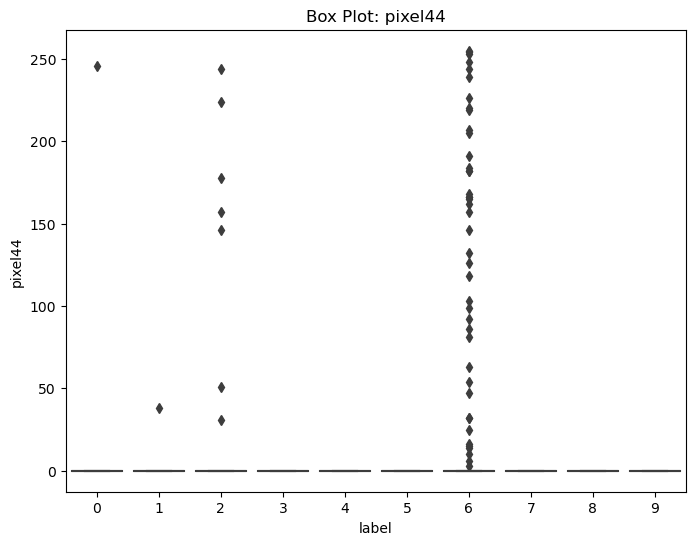

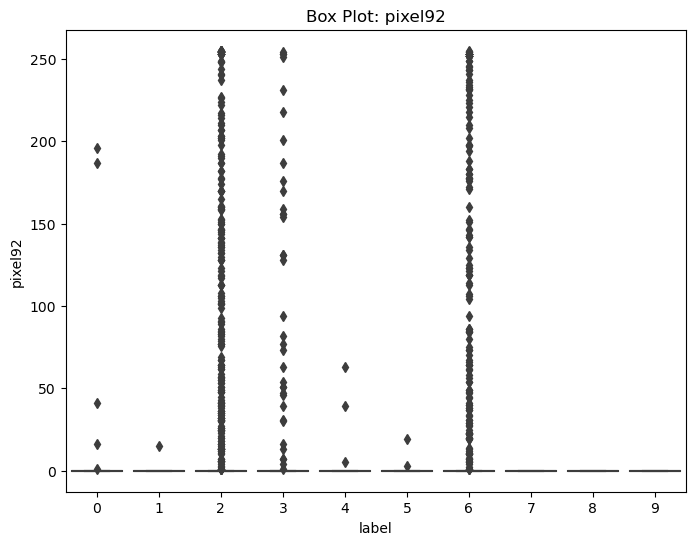

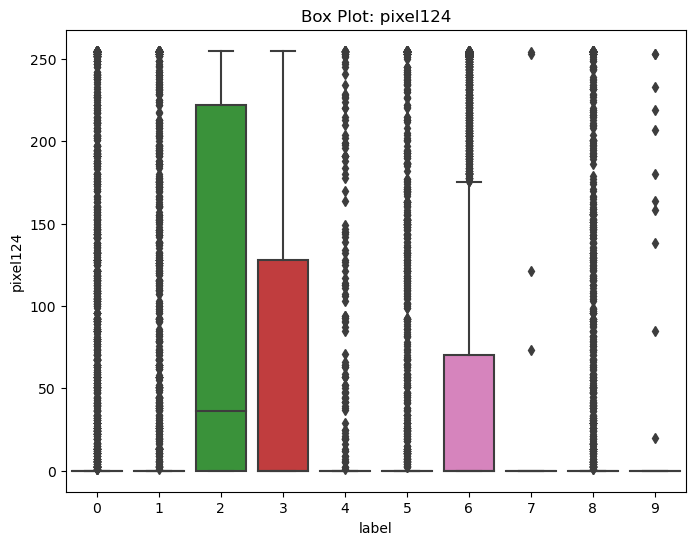

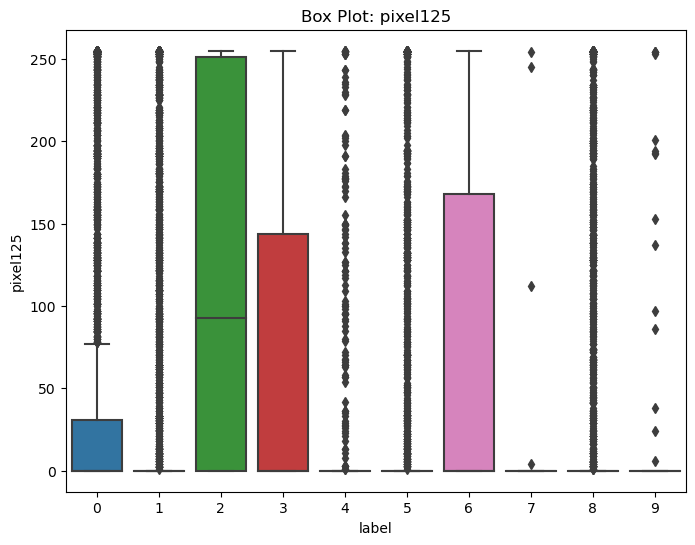

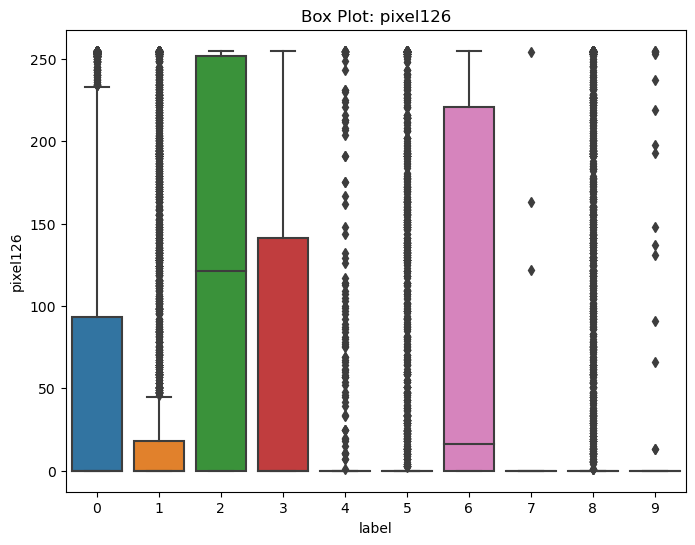

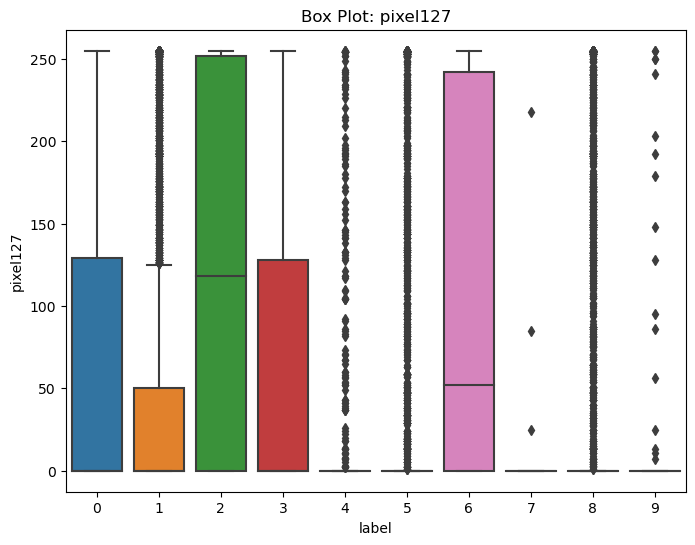

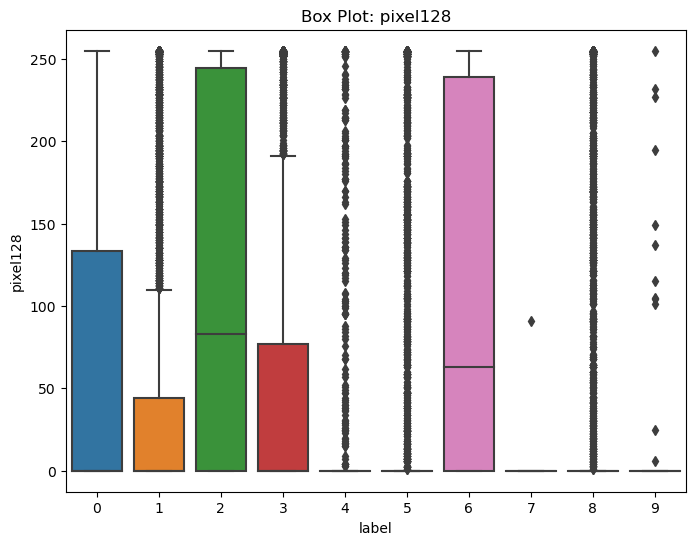

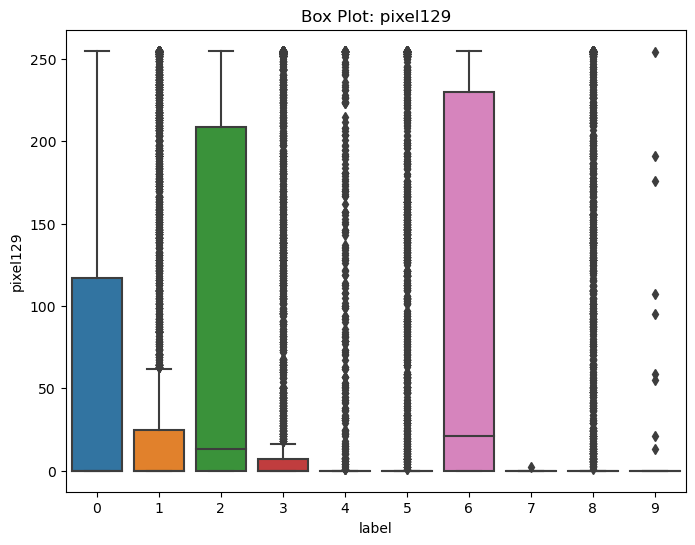

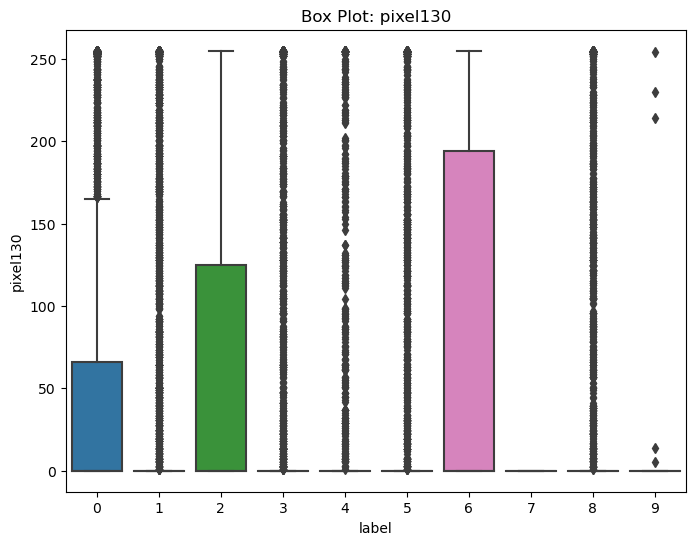

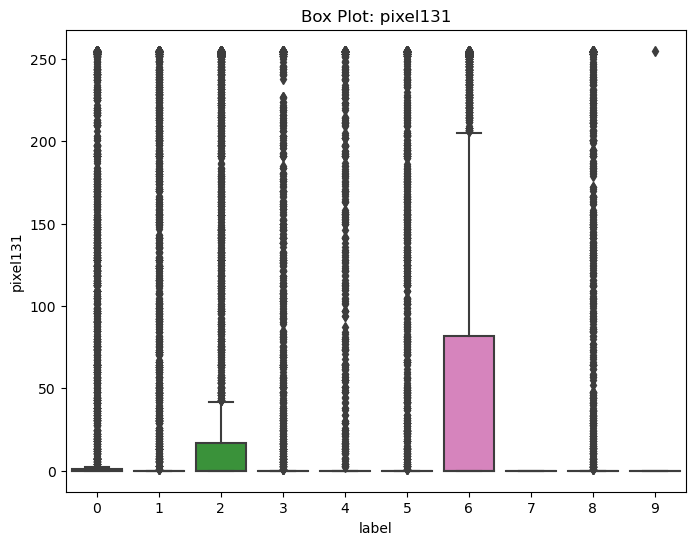

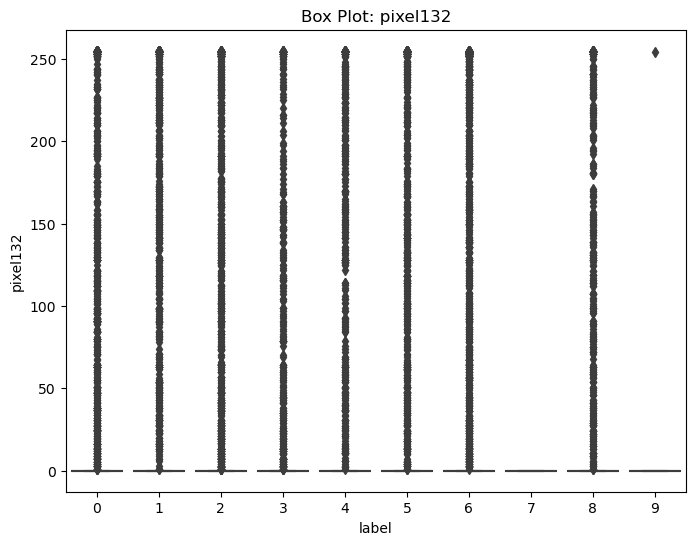

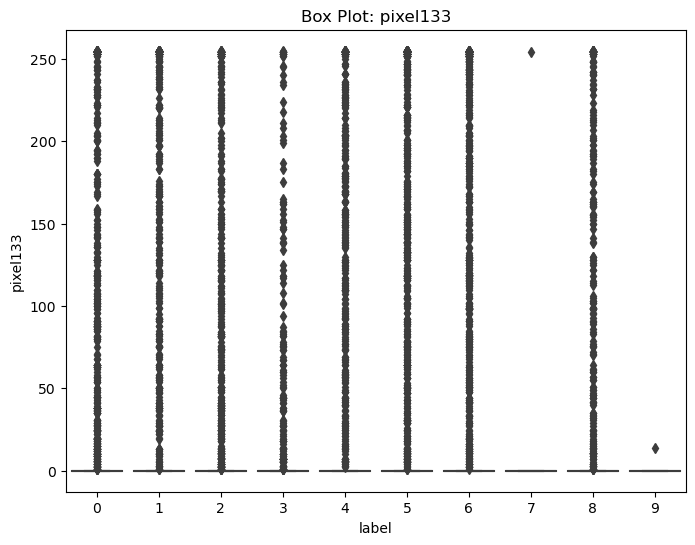

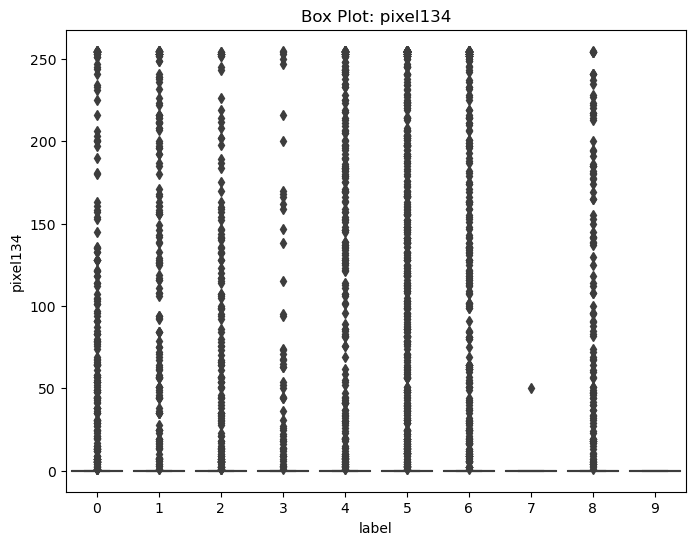

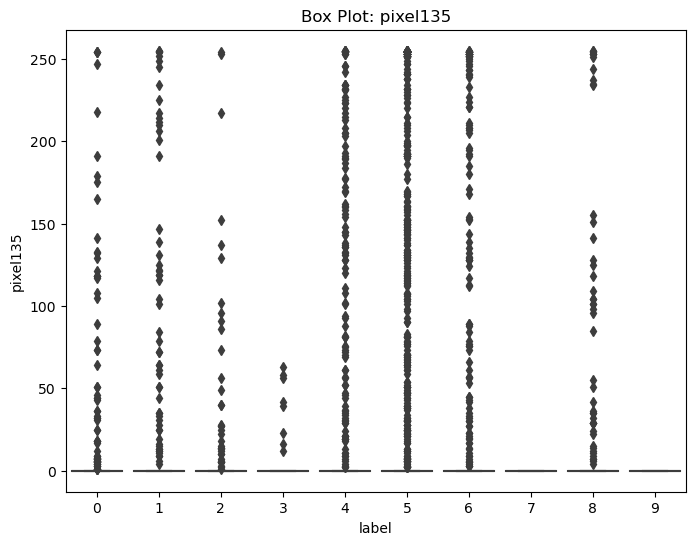

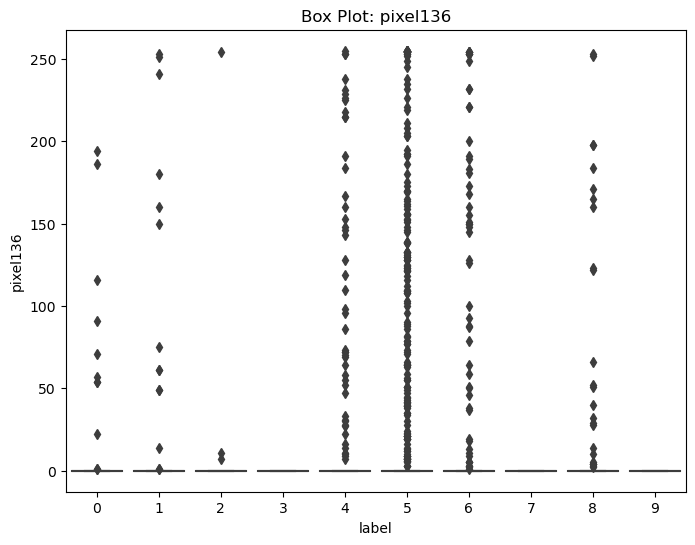

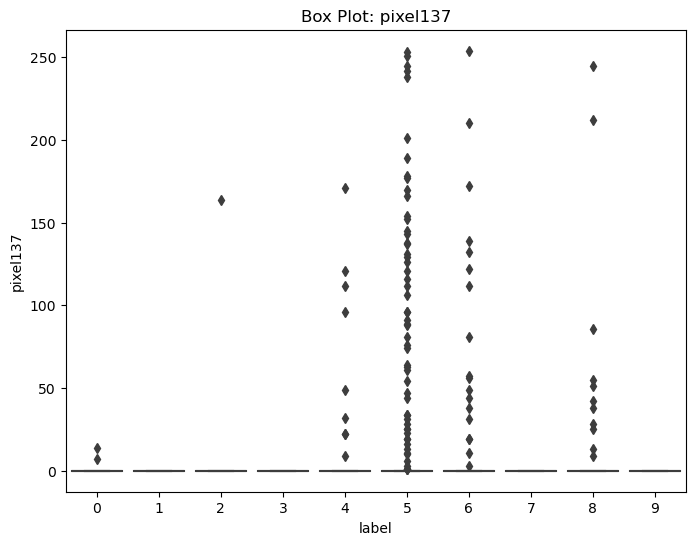

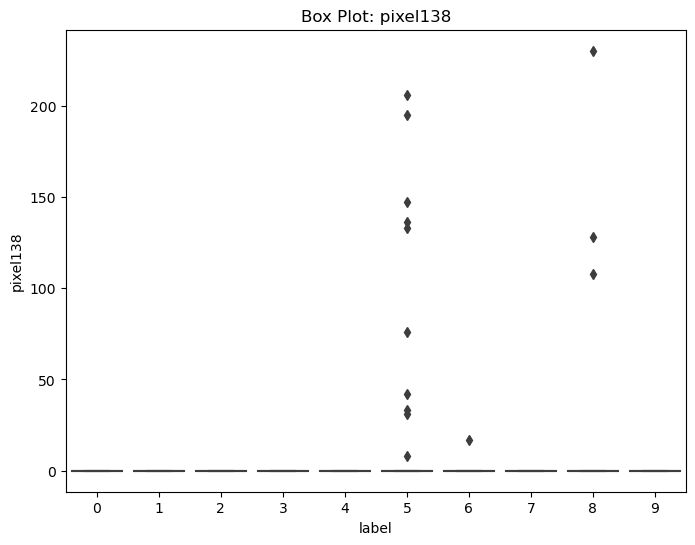

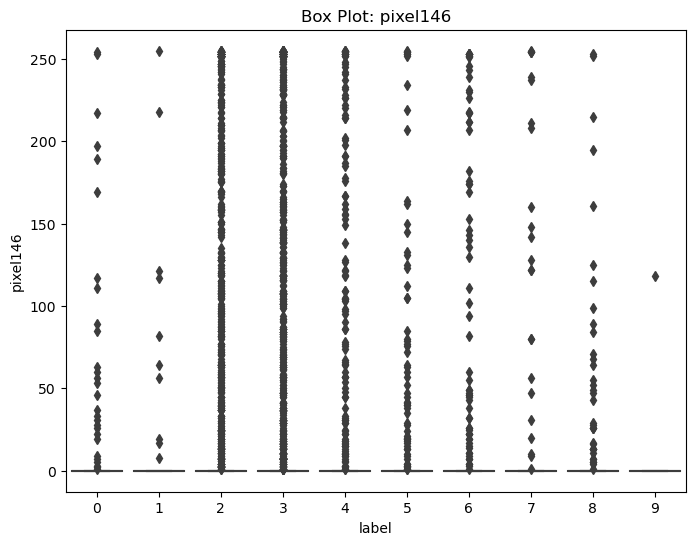

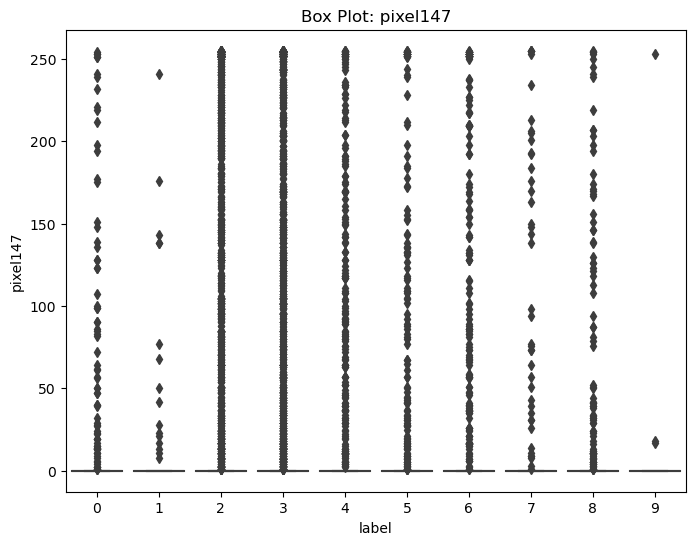

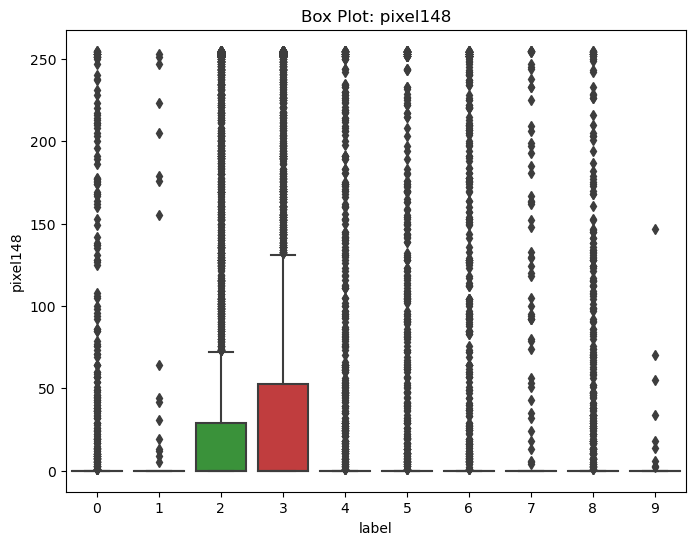

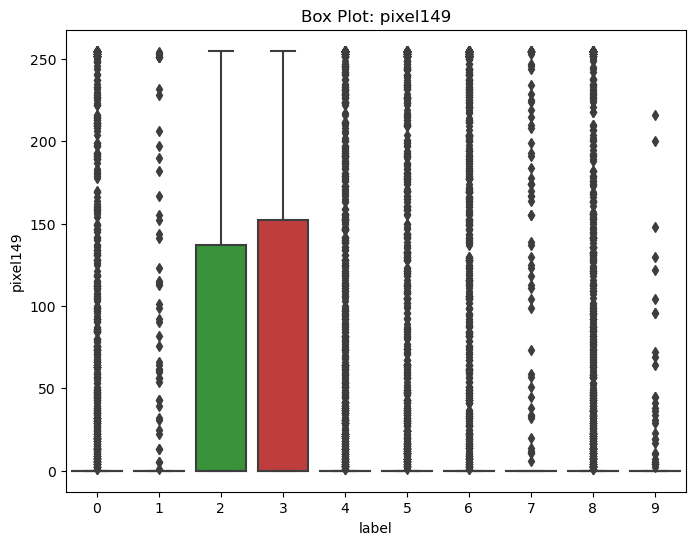

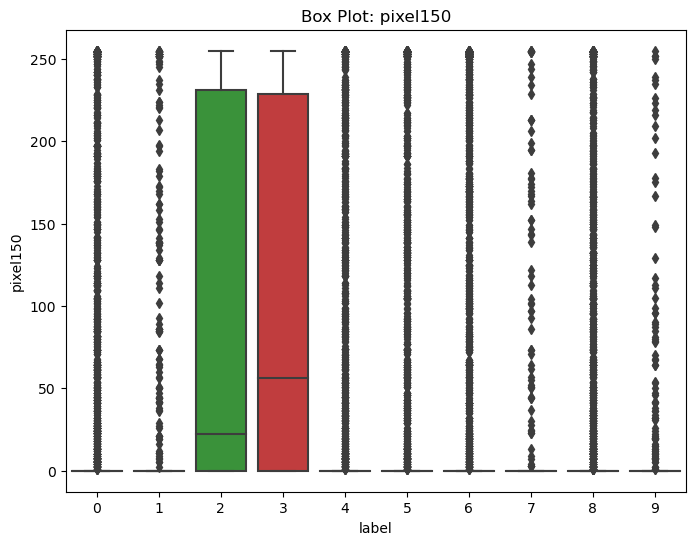

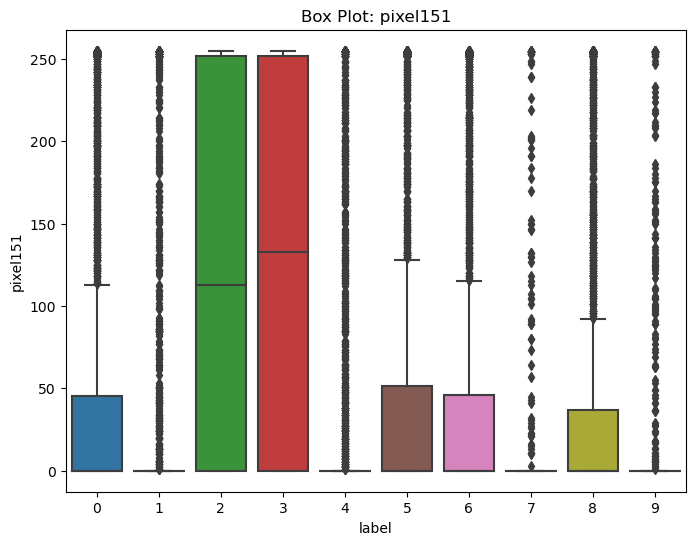

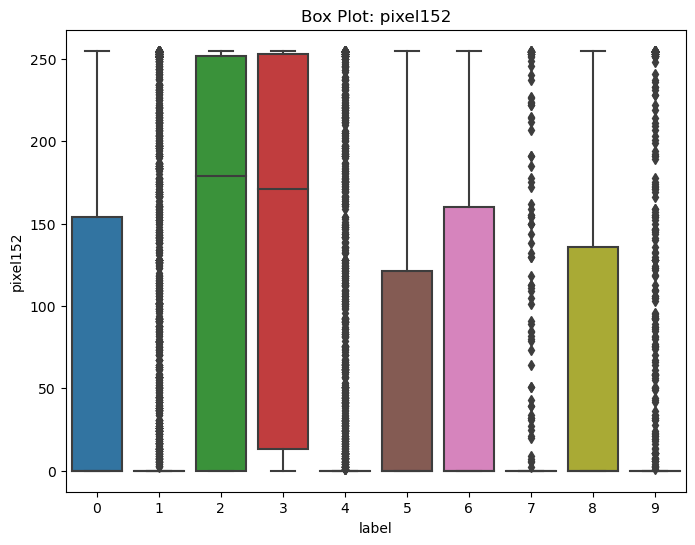

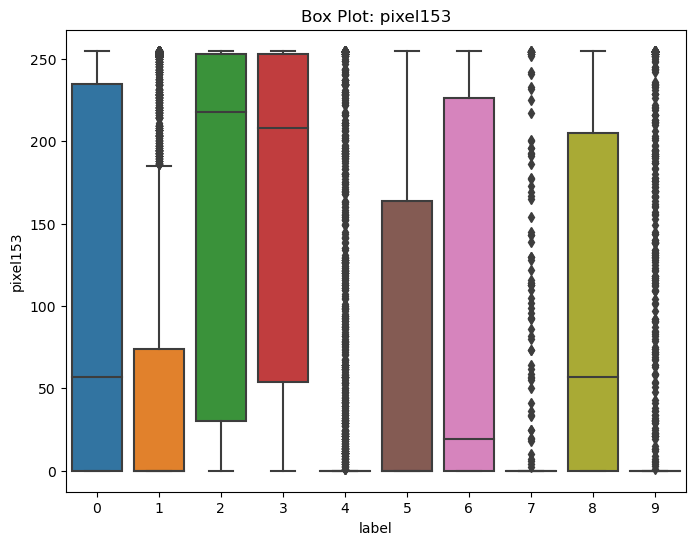

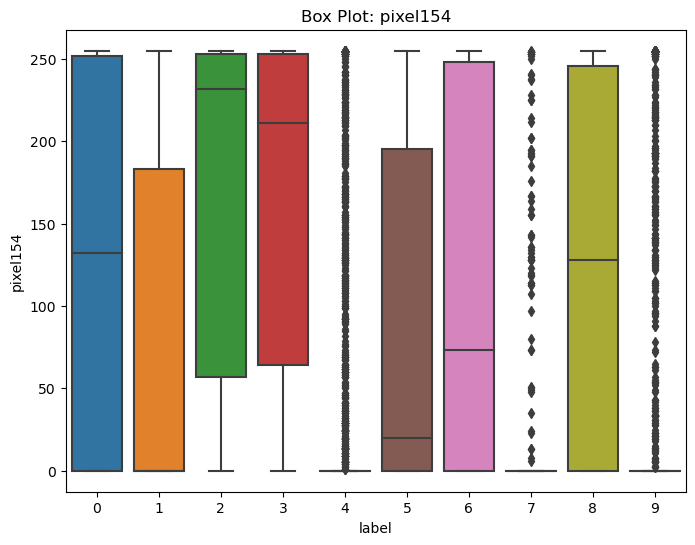

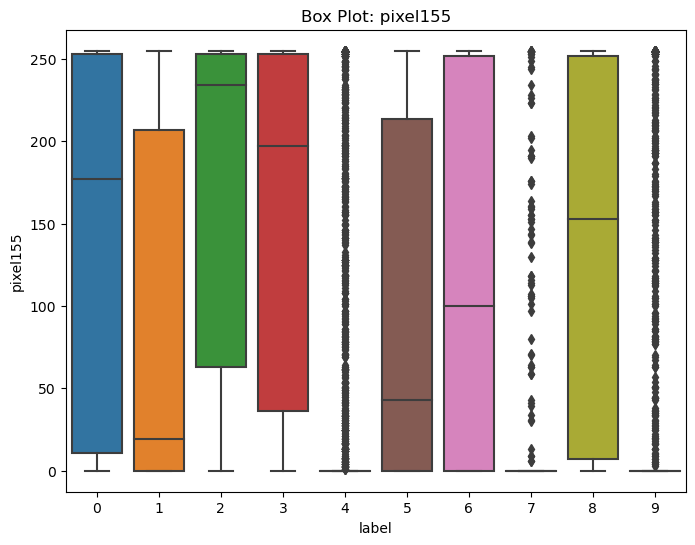

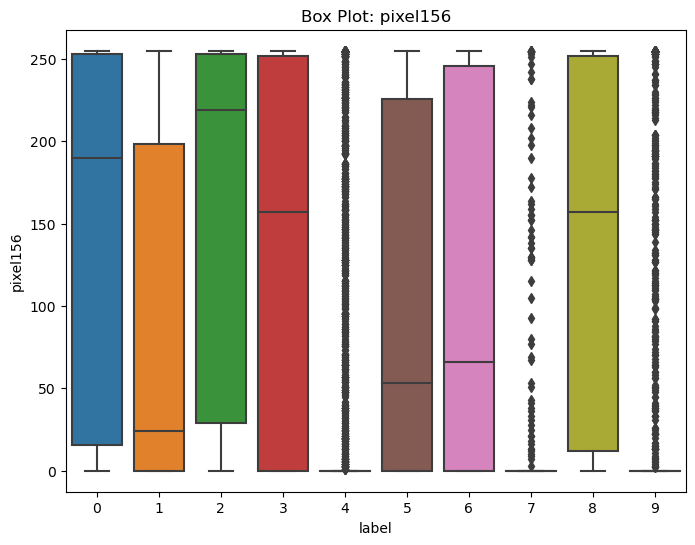

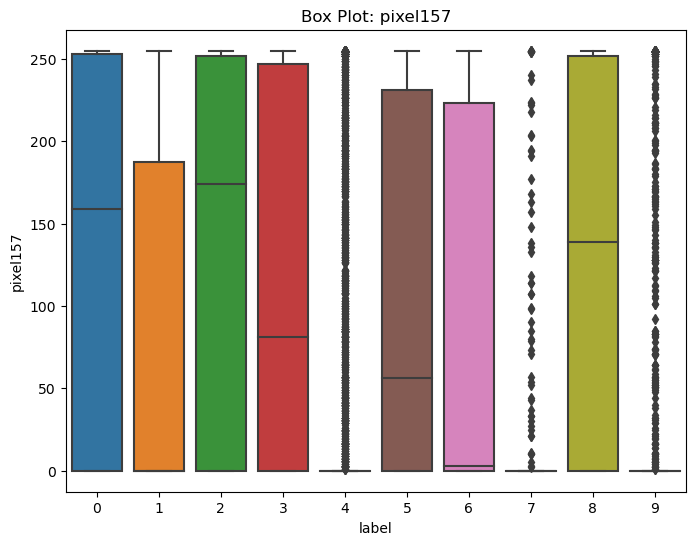

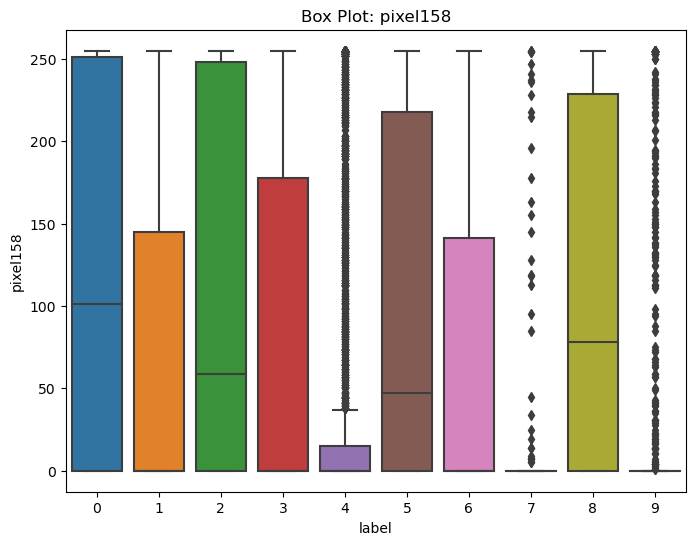

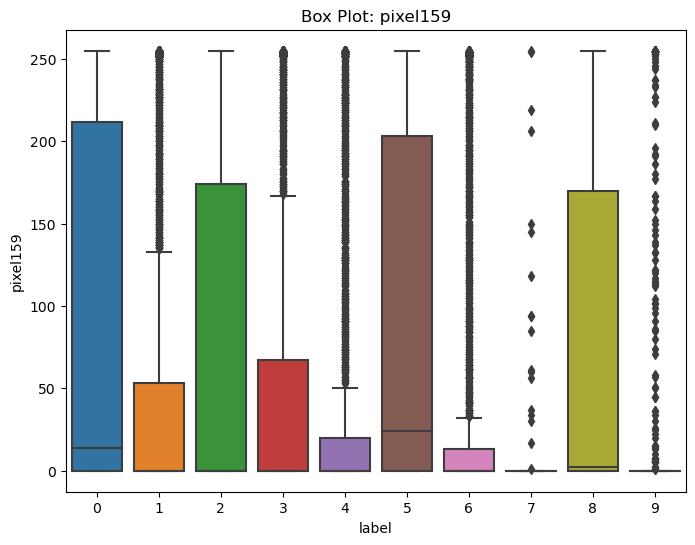

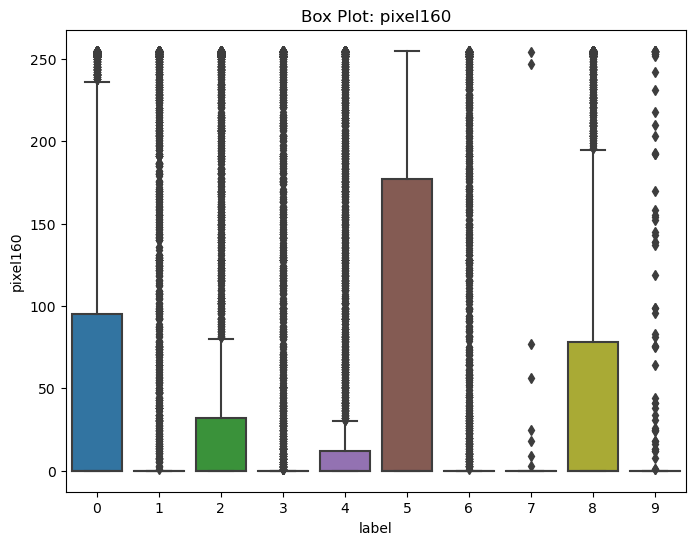

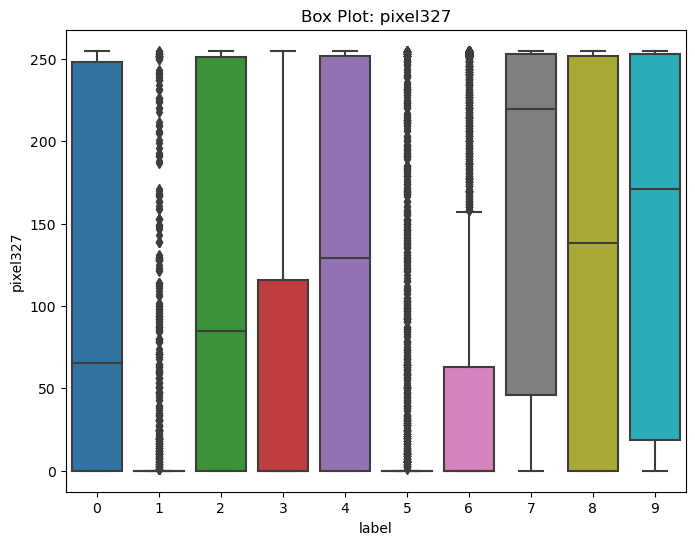

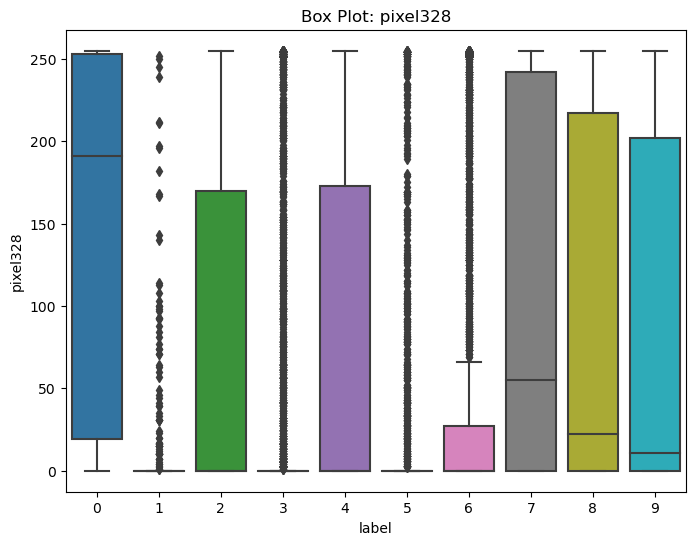

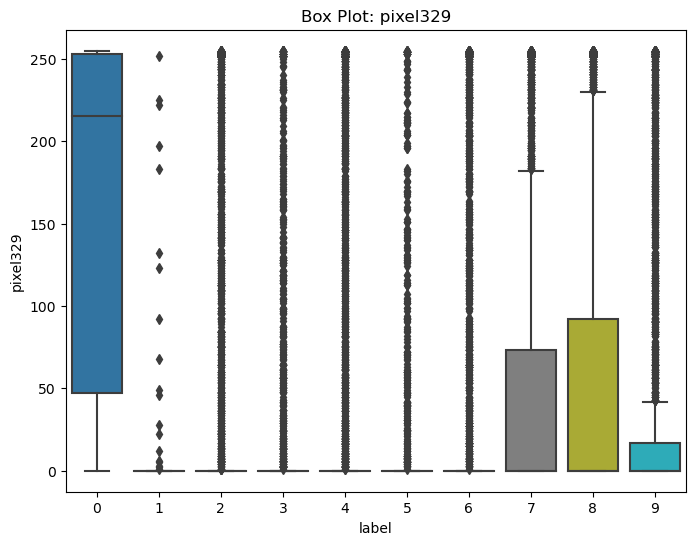

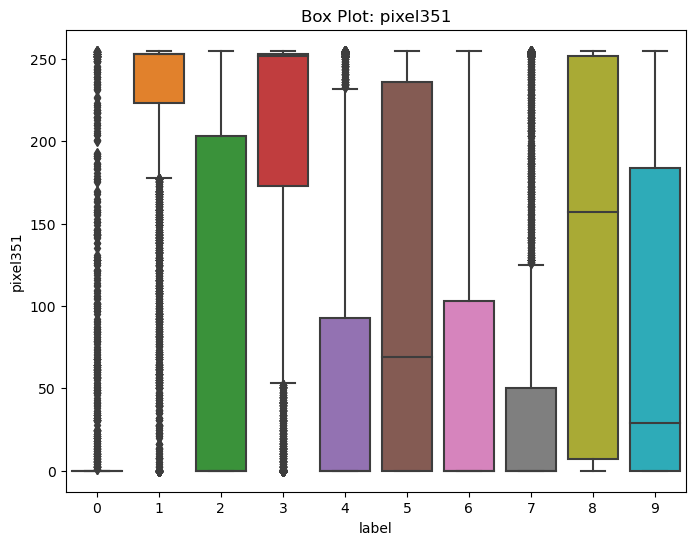

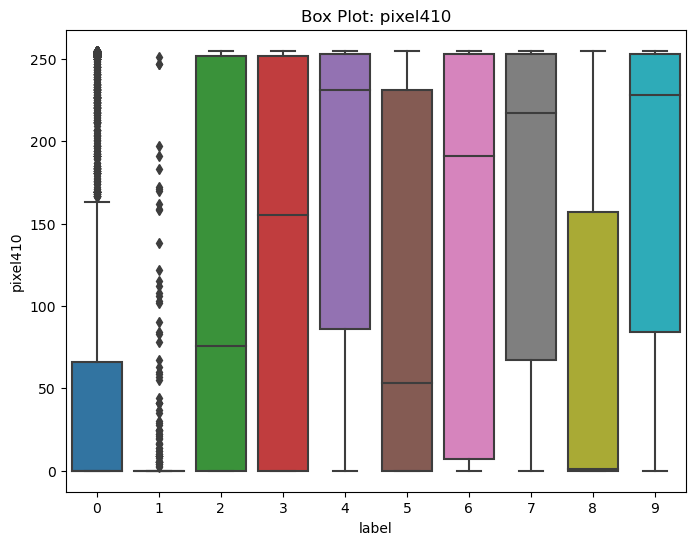

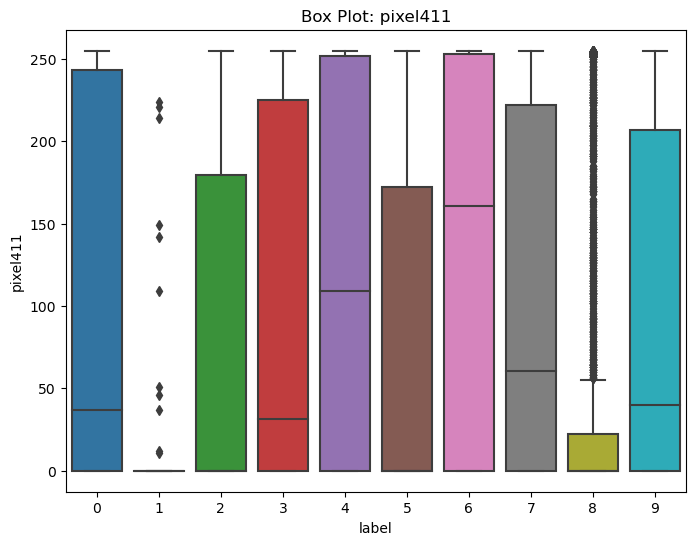

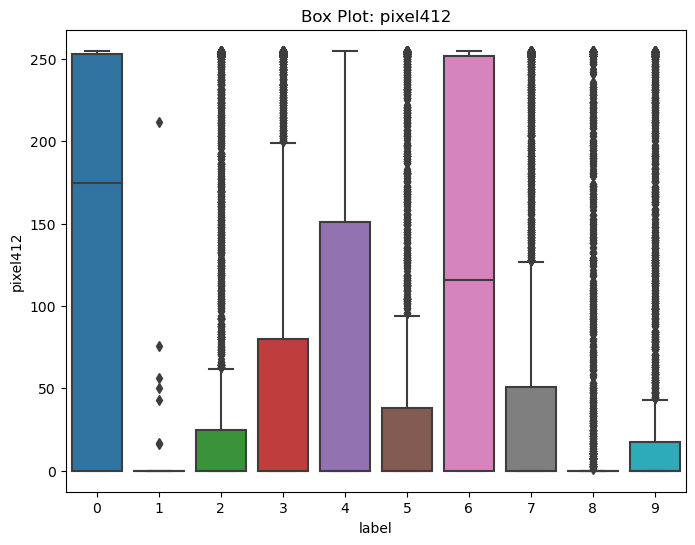

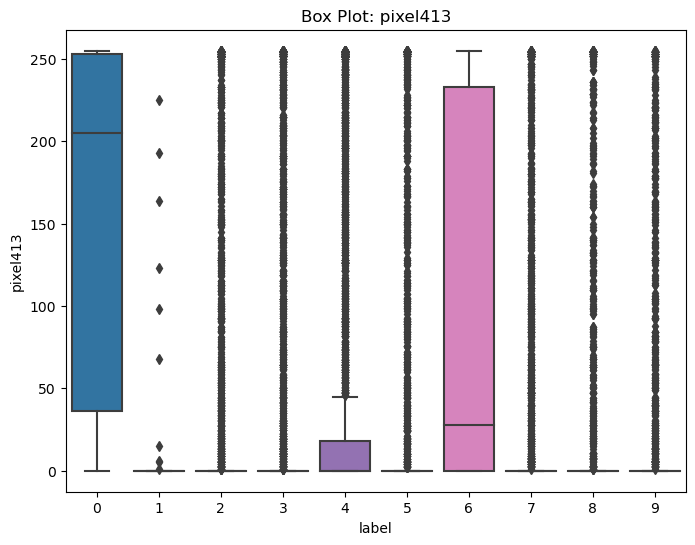

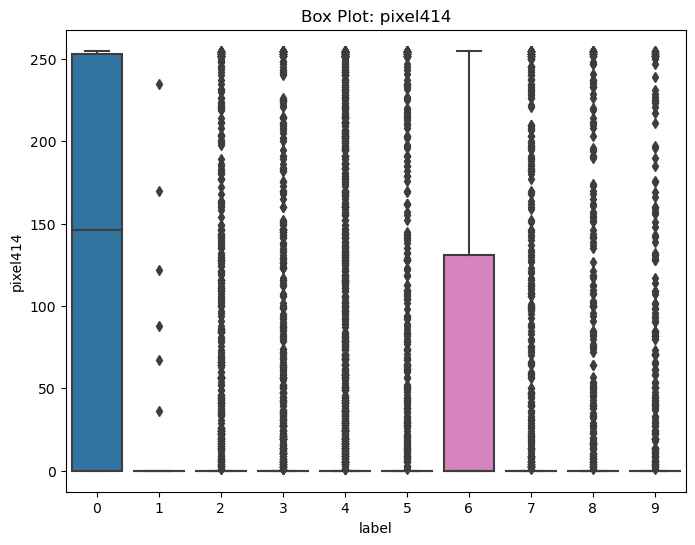

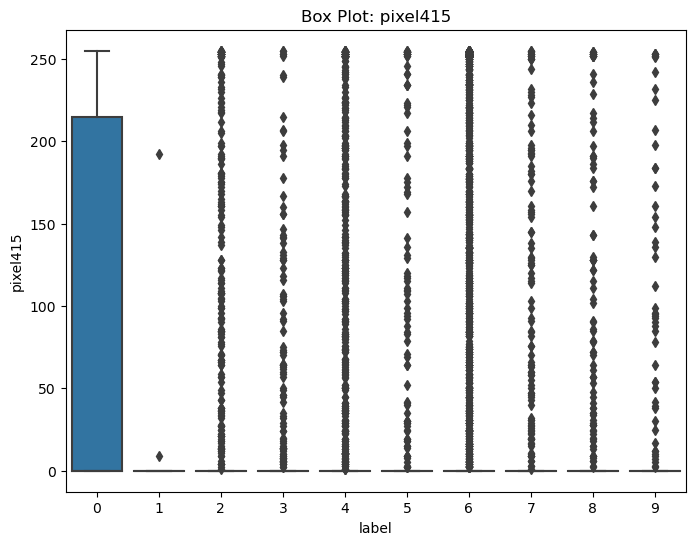

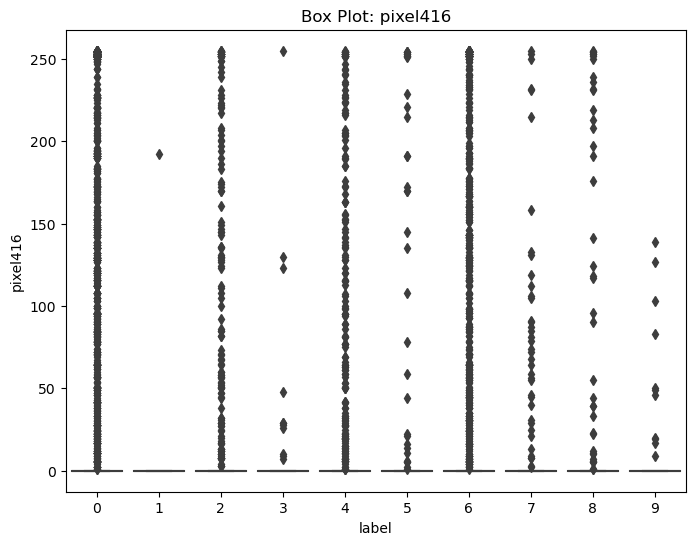

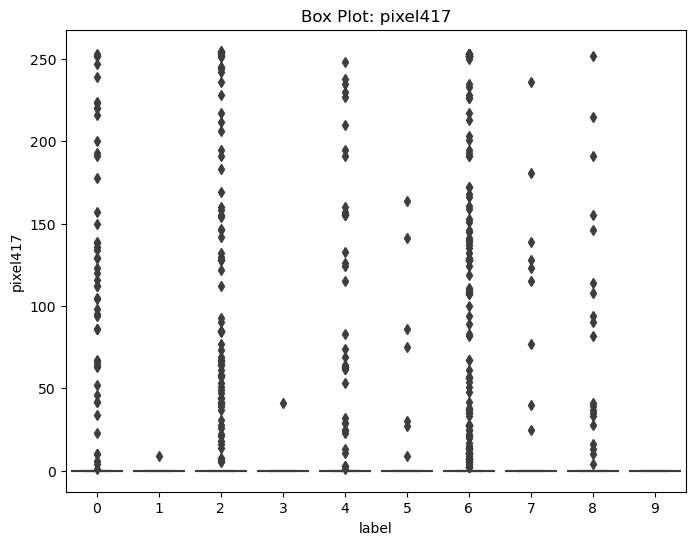

In [7]:


# Response Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_letters)
plt.title('Response Distribution')
plt.show()

# Box plots for each variable
for var in df_letters.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='label', y=var, data=df_letters)
    plt.title(f'Box Plot: {var}')
    plt.show()


# Train-Test Split

In [8]:

# Split the dataset into features (X) and the target variable (y)
X = df_letters.drop('label', axis=1)
y = df_letters['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# KNN MODEL

In [9]:

# Define the values of k to test for KNN
k_values = [3, 5, 10]

# Define the values of n_estimators (number of trees) to test for Random Forest
n_estimators_values = [100, 200, 400]

# Define the activation functions to use in the neural network
activation_functions = ['relu', 'tanh']

# Train and test KNN models with different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    }
    print(f"KNN (k={k}) Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



KNN (k=3) Metrics:
Accuracy: 0.6315333168194204
Precision: 0.619325745894887
Recall: 0.6210779167108245
F1 Score: 0.6160573128678952

KNN (k=5) Metrics:
Accuracy: 0.6519692841218727
Precision: 0.6439316994691592
Recall: 0.6422261554536296
F1 Score: 0.6388506760700164

KNN (k=10) Metrics:
Accuracy: 0.6649739905870696
Precision: 0.6607400242112588
Recall: 0.655761485493946
F1 Score: 0.6523492149012042



# RANDOM FOREST MODEL

In [10]:
# Train and test Random Forest models with different values of n_estimators
for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    }
    print(f"Random Forest (n_estimators={n_estimators}) Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()



Random Forest (n_estimators=100) Metrics:
Accuracy: 0.6979192469655685
Precision: 0.6923415995468511
Recall: 0.6900134474558375
F1 Score: 0.68931102812639

Random Forest (n_estimators=200) Metrics:
Accuracy: 0.6968045578399802
Precision: 0.6916495736021686
Recall: 0.689020865181359
F1 Score: 0.6882573891354554

Random Forest (n_estimators=400) Metrics:
Accuracy: 0.6949467426306664
Precision: 0.6900412912473765
Recall: 0.6869197163342361
F1 Score: 0.6864134527417183



# NEURAL NETWORK MODEL

In [11]:
# Train and test neural network models with different activation functions
for activation_func in activation_functions:
    nn = MLPClassifier(hidden_layer_sizes=(100,), activation=activation_func, random_state=42)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    }
    print(f"Neural Network ({activation_func.capitalize()}) Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Neural Network (Relu) Metrics:
Accuracy: 0.6839237057220708
Precision: 0.693150135730695
Recall: 0.6786001030344819
F1 Score: 0.6777401932859999

Neural Network (Tanh) Metrics:
Accuracy: 0.6758731731483775
Precision: 0.6729192739353496
Recall: 0.6683399174038236
F1 Score: 0.6649535740426689

